# Introduction

This project aims to provide personalized movie recommendations for users based on their past ratings or interactions. The system utilizes KNN to identify users with similar movie preferences and suggest movies they might enjoy. Additionally, the project explores the integration of Python output with Power BI for insightful data visualization.

 # Preliminary Wrangling

In [31]:
# import libarry
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Import the movie dataset
df = pd.read_csv("movies.csv", skiprows=[660479])  # Skip row 660479
df.columns
df

# Because rows 660479 was unable to import the csv. So, I worote the code to skkiped
# ParserError: Error tokenizing data. C error: EOF inside string starting at row 660479

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
3,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,683813734.0,167.0,Released,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...
4,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660473,699937,Zman Kenza,NaN,ar,Kenza has lived alone since the death of her h...,0.600,NaN,2011-01-01,0.0,0.0,98.0,Released,NaN,0.000,0.0,Abdellah Ferkous-Fadila Benmoussa-Adnane Mouhe...,NaN,NaN,NaN,NaN
660474,556487,Linda Barker - Simple Yoga,NaN,en,Linda Barker takes her yoga very seriously and...,0.600,NaN,2003-12-29,0.0,0.0,88.0,Released,"Positive Energy, Positive Weight Loss",0.000,0.0,NaN,NaN,/jV5tULRwy4uwRHMF2wuKOWPf01E.jpg,NaN,NaN
660475,866115,Hitlers München,NaN,de,NaN,0.600,ZDFinfo,NaN,0.0,0.0,0.0,Released,NaN,0.000,0.0,NaN,NaN,/z3sdietlJVmU94qvHXPKQnEWnME.jpg,NaN,NaN
660476,642985,Legal Errorist,NaN,en,A body junkie: man must lay bare his hidden in...,0.600,NaN,2005-01-02,0.0,0.0,15.0,Released,NaN,0.000,0.0,Stephanie Cumming,NaN,/z9OrcEtQOr9lWx6NBMPzhFLo5kG.jpg,NaN,NaN


In [32]:
#Delet Errors and NAN
df.dropna() 

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
3,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,683813734.0,167.0,Released,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...
4,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596426,941584,The Sound of an Endless Farewell,Romance-Drama,es,A loving relationship with differences that th...,0.600,Van Yareds-JOMA Bros Entertainment-Markezz Fil...,2022-05-20,300.0,0.0,30.0,Released,"The ""would have"" have never worked as a bridge...",7.000,2.0,Mario Alanís Torres-Ximena Sabar-Jesús Hernánd...,short film,/4CHuZBodEQGQPS2sWt3ZBGe2zjf.jpg,/hEuI0YODVrepctUoprvdbtk3EeL.jpg,812348
598010,149119,Signpost to Murder,Thriller-Crime,en,An escaped mental patient reported to be homic...,0.600,Metro-Goldwyn-Mayer-Marten Pictures,1964-12-04,0.0,0.0,74.0,Released,Are we all potential killers?,6.300,5.0,Joanne Woodward-Stuart Whitman-Edward Mulhare-...,escaped prisoner-crime wave,/6MDWrbbKjtq50eC1hiOxZgSPUrY.jpg,/jdaJxt0mxdV5v0cYlO0mg27emH9.jpg,118402
600474,887976,The History of the Civil War,Documentary-History,ru,The epic story of the Russian Civil War (1918-...,0.600,Narkompros,1921-06-01,0.0,0.0,94.0,Released,The lost film of the legendary film director,6.000,1.0,Leon Trotsky-Nicolai Kazadanov-Konstantin Mekh...,civil war-soviet union-anti-communism-russian ...,/3cmp4AqmuEdvHOjDkzFU0Cw000E.jpg,/hmc32SeuGS1OOM2rPFlvdJuaLbU.jpg,384814-34283
612886,275066,VeggieTales: The League of Incredible Vegetables,Family-Animation,en,When Dr. Flurry wants to freeze the town of Bu...,0.600,Big Idea Entertainment-Huhu Studios,2012-10

In [33]:
# Let's take a peak into the data's basic information
df.info(null_counts = True)

C:\Users\Window's-10\AppData\Local\Temp\ipykernel_8340\504113740.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660478 entries, 0 to 660477
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    660478 non-null  int64  
 1   title                 660474 non-null  object 
 2   genres                476046 non-null  object 
 3   original_language     660478 non-null  object 
 4   overview              556049 non-null  object 
 5   popularity            660478 non-null  float64
 6   production_companies  318200 non-null  object 
 7   release_date          615987 non-null  object 
 8   budget                660478 non-null  float64
 9   revenue               660478 non-null  float64
 10  runtime               633712 non-null  float64
 11  status                660478 non-null  object 
 12  tagline               103509 non-null  object 
 13  vote_average          660478 non-null  float64
 14  vote_count            660478 non-null  float64
 15  

# Descriptive statistics

In [34]:
print(df.describe(include='all'))

                   id   title       genres original_language  \
count   660478.000000  660474       476046            660478   
unique            NaN  525729        10827               161   
top               NaN    Home  Documentary                en   
freq              NaN      90        85304            347936   
mean    523069.576351     NaN          NaN               NaN   
std     262208.074810     NaN          NaN               NaN   
min          2.000000     NaN          NaN               NaN   
25%     312432.250000     NaN          NaN               NaN   
50%     533208.500000     NaN          NaN               NaN   
75%     750809.750000     NaN          NaN               NaN   
max     968160.000000     NaN          NaN               NaN   

                    overview     popularity production_companies release_date  \
count                 556049  660478.000000               318200       615987   
unique                497139            NaN               141072     

In [35]:
#show the number of unique user
df.shape[0]

660478

In [36]:
#show the number of unique user
df.nunique()

id                      602311
title                   525729
genres                   10827
original_language          161
overview                497139
popularity               20461
production_companies    141072
release_date             40872
budget                    4139
revenue                  12936
runtime                    623
status                       6
tagline                  91456
vote_average              3198
vote_count                3516
credits                 395728
keywords                114801
poster_path             441090
backdrop_path           187722
recommendations          31011
dtype: int64

In [37]:
# Any duplicates?
df.duplicated().sum()

0

In [38]:
# What about NaN values?
df.isnull().sum()

id                           0
title                        4
genres                  184432
original_language            0
overview                104429
popularity                   0
production_companies    342278
release_date             44491
budget                       0
revenue                      0
runtime                  26766
status                       0
tagline                 556969
vote_average                 0
vote_count                   0
credits                 194973
keywords                460789
poster_path             167038
backdrop_path           447917
recommendations         625505
dtype: int64

In [39]:
df.isnull().mean()

id                      0.000000
title                   0.000006
genres                  0.279240
original_language       0.000000
overview                0.158111
popularity              0.000000
production_companies    0.518228
release_date            0.067362
budget                  0.000000
revenue                 0.000000
runtime                 0.040525
status                  0.000000
tagline                 0.843282
vote_average            0.000000
vote_count              0.000000
credits                 0.295200
keywords                0.697660
poster_path             0.252905
backdrop_path           0.678171
recommendations         0.947049
dtype: float64

In [40]:
df.budget.mean()

436984.40437531605

In [41]:
df.budget.sum()

288618585433.0

In [42]:
df.revenue.mean()

1087986.0543439751

In [43]:
df.revenue.sum()

718590853201.0

In [44]:
df.runtime.sum()

84387806.0

In [45]:
df.runtime.mean()

133.16428598480067

# visualization

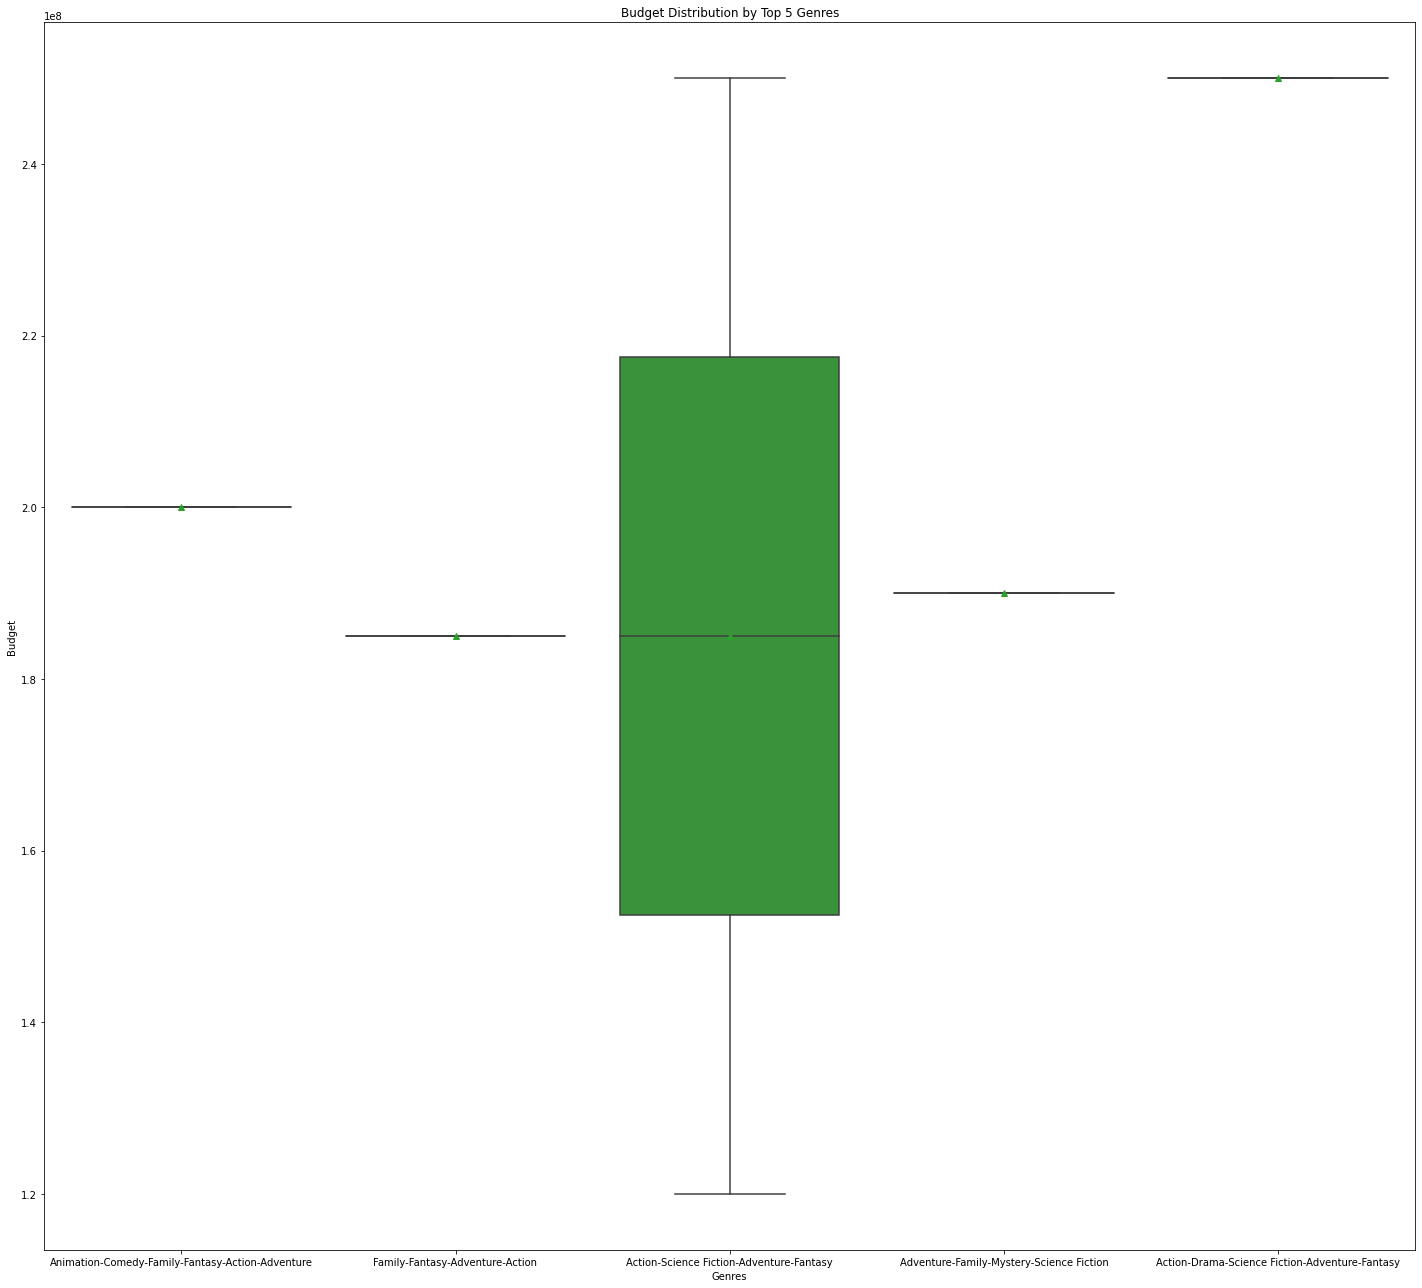

In [46]:
# Ensure you have data cleaning steps (like handling missing values) before this step
budget_means = df.groupby("genres")["budget"].mean().sort_values(ascending=False)
top_5_genres = budget_means.index[:5].tolist()  # Get top 5 genres

# Filter data for the top 5 genres
filtered_data = df[df["genres"].isin(top_5_genres)]
fig, ax = plt.subplots(figsize=(20, 18))  # Replace with your desired size
sns.boxplot(x="genres", y="budget", showmeans=True, data=filtered_data, ax=ax)
plt.xlabel("Genres")
plt.ylabel("Budget")
plt.title("Budget Distribution by Top 5 Genres")
plt.tight_layout()
plt.show()

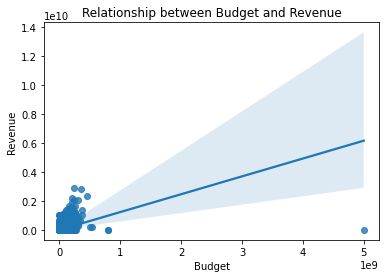

In [47]:
sns.regplot(x="budget", y="revenue", data=df)
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Relationship between Budget and Revenue")
plt.show()

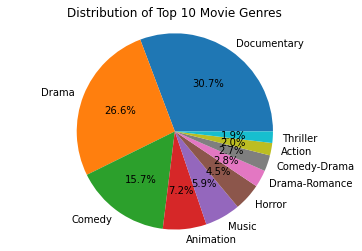

In [48]:
# Get the top 10 genres (modify 10 to your desired number)
genres_count = df["genres"].value_counts().head(10).sort_values(ascending=False)

# Create the pie chart
plt.pie(genres_count, labels=genres_count.index, autopct="%1.1f%%")

# Set chart title
plt.title("Distribution of Top 10 Movie Genres")

# Optional: Customize the plot (consider for readability with many slices)
plt.axis("equal")  # Equal aspect ratio ensures a circular pie chart

# Show the plot
plt.show()


# Machine Learning

In [49]:
#Calculating the mean of vote avg
C = df['vote_average'].mean()
print("C =",C)

# The minimum number of votes to be considered
m = 50
print("m =",m)

C = 2.5797935661753106
m = 50


In [50]:
# Calculating the weighted rating of each movie
def weighted_rate(v, R, m=m, C=C):
    ans = (v/(v+m) * R)+(m/(v+m) * C)
    return ans
df['Score'] = df.apply(lambda row : weighted_rate(row['vote_count'], row['vote_average']), axis = 1) 
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,Score
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,...,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...,6.920017
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,...,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...,7.025168
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,...,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...,7.114825
3,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,683813734.0,...,Released,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...,8.198578
4,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,...,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...,6.438367


In [51]:
conbas_df = df[['title','genres','production_companies','credits','keywords', 'original_language']]

In [52]:
conbas_df = conbas_df.replace(r'\-', '', regex=True)
conbas_df = conbas_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
conbas_df.head()

,title,genres,production_companies,credits,keywords,original_language
0,meg 2: the trench,actionscience fictionhorror,apelles entertainmentwarner bros. picturesdi b...,jason stathamwu jingshuya sophia caisergio per...,based on novel or booksequelkaiju,en
1,the pope's exorcist,horrormysterythriller,screen gems2.0 entertainmentjesus & maryworldw...,russell crowedaniel zovattoalex essoefranco ne...,spainrome italyvaticanpopepigpossessionconspir...,en
2,transformers: rise of the beasts,actionadventurescience fiction,skydanceparamountdi bonaventura picturesbay fi...,anthony ramosdominique fishbackluna lauren vel...,perualienend of the worldbased on cartoonbased...,en
3,dune: part two,science fictionadventure,legendary pictures,timothée chalametzendayarebecca fergusonjavier...,epicbased on novel or bookfightsandstormsandsp...,en
4,antman and the wasp: quantumania,actionadventurescience fiction,marvel studioskevin feige productions,paul ruddevangeline lillyjonathan majorskathry...,heroantsequelsuperherobased on comicfamilysupe...,en


In [53]:
# Making a soup
conbas_df['Soup'] = conbas_df['keywords'] + ' ' + conbas_df['genres'] + ' ' + conbas_df['production_companies'] + ' ' + conbas_df['credits'] + ' ' + conbas_df['original_language']
conbas_df = conbas_df.drop(columns=['genres','production_companies','credits','keywords', 'original_language'])
conbas_df.head()

,title,Soup
0,meg 2: the trench,based on novel or booksequelkaiju actionscienc...
1,the pope's exorcist,spainrome italyvaticanpopepigpossessionconspir...
2,transformers: rise of the beasts,perualienend of the worldbased on cartoonbased...
3,dune: part two,epicbased on novel or bookfightsandstormsandsp...
4,antman and the wasp: quantumania,heroantsequelsuperherobased on comicfamilysupe...


In [54]:
df = pd.merge(df,conbas_df, left_on=['title'], right_on=['title'], how='left')
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,Score,Soup
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,...,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...,6.920017,NaN
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,...,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...,7.025168,NaN
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,...,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...,7.114825,NaN
3,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,683813734.0,...,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...,8.198578,NaN
4,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,...,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...,6.438367,NaN


In [55]:
df_rec = df

In [56]:
# Creating the count matrix
df_rec_filtered = df_rec.dropna(subset=['Soup'])
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_rec_filtered['Soup'])

# Print the count matrix (optional)
print(count_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [57]:
# Compute the Cosine Similarity matrix based on the count_matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [58]:
df_rec = df_rec.reset_index()
indices = pd.Series(df_rec.index, index=df_rec['title'])

In [59]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim = cosine_sim):
# Get the index of the movie that matches the title
    idx = indices[title]  
# Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))   
    
#print(sim_scores)
# Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) 
    
# Get the movie indices
    movie_indices = [i[0] for i in sim_scores]  

#print(sim_scores)
#sim_scores = sim_scores[1:16]  # Get the scores of the 15 most similar movies
#print(sim_scores)
# Getting the weighted ratings of the movies 
    movies = df_rec.iloc[movie_indices][['title', 'release_date', 'Score','original_language']][1:11]  
    
# Return the top 15 most similar movies arranged by ratings
    return movies.sort_values('Score', ascending = False)

In [60]:
get_recommendations('I Am Legend')

,title,release_date,Score,original_language
443,The Dark Knight Rises,2012-07-17,7.765020,en
765,Godzilla vs. Kong,2021-03-24,7.647609,en
803,I Am Legend,2007-12-12,7.177648,en
805,"Happy Halloween, Scooby-Doo!",2020-10-06,6.809794,en
1109,Dragon Ball Z: Cooler's Revenge,1991-07-20,6.526925,ja
293,Morbius,2022-03-30,6.128581,en
543,The Mother,2023-05-04,5.536100,en
1024,Super Monsters: Once Upon a Rhyme,2021-06-01,4.639194,en
199,AI Love You,2022-02-15,3.519862,th
279,人妻性奴隶：美人妻调教日记,2017-07-07,2.579794,zh
